In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly as pi
import cufflinks as cf
from plotly.offline import iplot
pi.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [90]:
df = pd.read_csv('elonmusk_tweets.csv')

In [91]:
df.head()

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
1,848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
2,848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
4,848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."


In [92]:
df.isnull().sum()

id            0
created_at    0
text          0
dtype: int64

In [93]:
ndf=pd.DataFrame(columns=['tweet','tweet_length',
                      'avg_length','word_length','polarity'])


In [94]:
ndf['tweet']=df['text']

In [95]:
ndf

,tweet,tweet_length,avg_length,word_length,polarity
0,b'And so the robots spared humanity ... https:...,NaN,NaN,NaN,NaN
1,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa...",NaN,NaN,NaN,NaN
2,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",NaN,NaN,NaN,NaN
3,b'Stormy weather in Shortville ...',NaN,NaN,NaN,NaN
4,"b""@DaveLeeBBC @verge Coal is dying due to nat ...",NaN,NaN,NaN,NaN
...,...,...,...,...,...
2814,b'That was a total non sequitur btw',NaN,NaN,NaN,NaN
2815,"b'Great Voltaire quote, arguably better than T...",NaN,NaN,NaN,NaN
2816,b'I made the volume on the Model S http://t.co...,NaN,NaN,NaN,NaN
2817,"b""Went to Iceland on Sat to ride bumper cars o...",NaN,NaN,NaN,NaN


In [96]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [97]:
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x.replace(key,value)
        return x
    else:
        return x

In [98]:
%%time
ndf['tweet'] = ndf['tweet'].apply(lambda x: cont_to_exp(x))

Wall time: 296 ms


In [99]:
' '.join(ndf['tweet'].tolist())

'b\'And so the robots spared humanity ... https://t.co/v7JUJQWfCv\' b"@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that\'s irrxe2x80xa6 https://t.co/qQcTqkzgMl" b\'@waltmossberg @mims @defcon_5 Et tu, Walt?\' b\'Stormy weather in Shortville ...\' b"@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It\'s basically dead." b"@Lexxxzis It\'s just a helicopter in helicopter\'s clothing" b"@verge It won\'t matter" b\'@SuperCoolCube Pretty good\' b"Why did we waste so much time developing silly rockets? Damn you, aliens! So obtuse! You have all this crazy tech, but can\'t speak English!?" b\'Technology breakthrough: turns out chemtrails are actually a message from time-traveling aliens describing the secret of teleportation\' b"RT @OpenAI: We\'ve created the world\'s first Spam-detecting AI trained entirely in simulation and deployed on a physical robot: https://t.coxe2x80xa6" b\'RT @ProfBrianCox: This is extremely important 

In [100]:
ndf.head()

,tweet,tweet_length,avg_length,word_length,polarity
0,b'And so the robots spared humanity ... https:...,NaN,NaN,NaN,NaN
1,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa...",NaN,NaN,NaN,NaN
2,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",NaN,NaN,NaN,NaN
3,b'Stormy weather in Shortville ...',NaN,NaN,NaN,NaN
4,"b""@DaveLeeBBC @verge Coal is dying due to nat ...",NaN,NaN,NaN,NaN


In [101]:
import re
ndf['tweet']=ndf['tweet'].apply(lambda x: re.sub(r"http\S+", "", x))

In [102]:
ndf['tweet']=ndf['tweet'].apply(lambda x: re.sub(r'\\([!:])', r'\1', x))

In [103]:
' '.join(ndf['tweet'].tolist())

'b\'And so the robots spared humanity ...  b"@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that\'s irrxe2x80xa6  b\'@waltmossberg @mims @defcon_5 Et tu, Walt?\' b\'Stormy weather in Shortville ...\' b"@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It\'s basically dead." b"@Lexxxzis It\'s just a helicopter in helicopter\'s clothing" b"@verge It won\'t matter" b\'@SuperCoolCube Pretty good\' b"Why did we waste so much time developing silly rockets? Damn you, aliens! So obtuse! You have all this crazy tech, but can\'t speak English!?" b\'Technology breakthrough: turns out chemtrails are actually a message from time-traveling aliens describing the secret of teleportation\' b"RT @OpenAI: We\'ve created the world\'s first Spam-detecting AI trained entirely in simulation and deployed on a physical robot:  b\'RT @ProfBrianCox: This is extremely important from @elonmusk and @SpaceX - reusable rockets bring us MUCH closer to b

In [104]:
# ndf['tweet']=ndf['tweet'].apply(lambda x: x.decode('ascii'))

In [105]:
ndf.head()

,tweet,tweet_length,avg_length,word_length,polarity
0,b'And so the robots spared humanity ...,NaN,NaN,NaN,NaN
1,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa...",NaN,NaN,NaN,NaN
2,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",NaN,NaN,NaN,NaN
3,b'Stormy weather in Shortville ...',NaN,NaN,NaN,NaN
4,"b""@DaveLeeBBC @verge Coal is dying due to nat ...",NaN,NaN,NaN,NaN


In [106]:
def remove_prefix(text, prefix):
    if text.startswith(prefix):
        return text[len(prefix):]
    return text  # or whatever

In [107]:
ndf['tweet']=ndf['tweet'].apply(lambda x: remove_prefix(x,'b'))

In [110]:
ndf['tweet']=ndf['tweet'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', x)) 

In [111]:
ndf


,tweet,tweet_length,avg_length,word_length,polarity
0,And so the robots spared humanity,NaN,NaN,NaN,NaN
1,ForIn2020 waltmossberg mims defcon5 Exactly Te...,NaN,NaN,NaN,NaN
2,waltmossberg mims defcon5 Et tu Walt,NaN,NaN,NaN,NaN
3,Stormy weather in Shortville,NaN,NaN,NaN,NaN
4,DaveLeeBBC verge Coal is dying due to nat gas ...,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2814,That was a total non sequitur btw,NaN,NaN,NaN,NaN
2815,Great Voltaire quote arguably better than Twai...,NaN,NaN,NaN,NaN
2816,I made the volume on the Model S go to 11 No...,NaN,NaN,NaN,NaN
2817,Went to Iceland on Sat to ride bumper cars on ...,NaN,NaN,NaN,NaN


 # Calculating Polarity of tweets

In [114]:
from textblob import TextBlob 
ndf['polarity'] = ndf['tweet'].apply(lambda x:TextBlob(x).sentiment.polarity)

# Calculating Length of tweet

In [116]:
ndf['tweet_length'] = ndf['tweet'].apply(lambda x:len(x))

# Calculating total words of each tweet

In [119]:
ndf['word_length'] = ndf['tweet'].apply(lambda x:len(x.split()))

# Calculating Average word length of each tweet

In [151]:
def get_avg_word_length(x):
    words = x.split()
    if(len(words)!=0):
        average = sum(len(word) for word in words) / len(words)
        return average

In [152]:
ndf['avg_length'] = ndf['tweet'].apply(lambda x: get_avg_word_length(x))

# Plotting the data

In [242]:
ndf['polarity'].iplot(kind='hist', xTitle='Polarity', yTitle='Count', title='Polarity Distribution', colors='red')

In [164]:
ndf['tweet_length'].iplot(kind='hist', colors='red' , bins = 50,
                           xTitle='Tweet Length', yTitle='Count', 
                           title='Tweet Length Distribution')

In [165]:
ndf['avg_length'].iplot(kind='hist', colors='red' , bins = 50,
                           xTitle='Average Word Length', yTitle='Count', 
                           title='Average Word Length Distribution')

In [166]:
ndf['word_length'].iplot(kind='hist', colors='red' , bins = 50,
                           xTitle='Word Count ', yTitle='Count', 
                           title='Word Count Distribution')

In [168]:
#Unigra, Bigram and Trigram Distribution
from sklearn.feature_extraction.text import CountVectorizer


# Unigram Anlysis

In [182]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(1,1), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_frequency = [(word, sum_words[0, index]) for word, index in vec.vocabulary_.items()]
    word_frequency = sorted(words_frequency, key =lambda x: x[1], reverse= True)
    return words_frequency[:n]

In [183]:
words = get_top_n_words(ndf['tweet'],20)

In [188]:
uni_gram_df = pd.DataFrame(words,columns=['unigram','Frequency'])
uni_gram_df = uni_gram_df.set_index('unigram')

In [235]:
uni_gram_df.iplot(kind='bar', xTitle='Words', yTitle='Count', title='Unigram Distribution', colors='red')

# Bigram Analysis

In [192]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_frequency = [(word, sum_words[0, index]) for word, index in vec.vocabulary_.items()]
    word_frequency = sorted(words_frequency, key =lambda x: x[1], reverse= True)
    return words_frequency[:n]

In [197]:
bi_words = get_top_n_words(ndf['tweet'],20)


In [198]:
bi_words

[('robots spared', 1),
 ('spared humanity', 1),
 ('forin2020 waltmossberg', 1),
 ('waltmossberg mims', 2),
 ('mims defcon5', 2),
 ('defcon5 exactly', 1),
 ('exactly tesla', 1),
 ('tesla absurdly', 1),
 ('absurdly overvalued', 1),
 ('overvalued based', 1),
 ('based past', 1),
 ('past thats', 1),
 ('thats irrxe2x80xa6', 1),
 ('defcon5 et', 1),
 ('et tu', 1),
 ('tu walt', 1),
 ('stormy weather', 2),
 ('weather shortville', 2),
 ('daveleebbc verge', 1),
 ('verge coal', 1)]

In [199]:
bi_gram_df = pd.DataFrame(bi_words,columns=['bigram','Frequency'])
bi_gram_df = bi_gram_df.set_index('bigram')

In [236]:
bi_gram_df.iplot(kind='bar', xTitle='Words', yTitle='Count', title='Bigram Distribution', colors='red')

# Trigram Analysis

In [202]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3,3), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_frequency = [(word, sum_words[0, index]) for word, index in vec.vocabulary_.items()]
    word_frequency = sorted(words_frequency, key =lambda x: x[1], reverse= True)
    return words_frequency[:n]

In [203]:
tri_words = get_top_n_words(ndf['tweet'],20)


In [204]:
tri_words

[('robots spared humanity', 1),
 ('forin2020 waltmossberg mims', 1),
 ('waltmossberg mims defcon5', 2),
 ('mims defcon5 exactly', 1),
 ('defcon5 exactly tesla', 1),
 ('exactly tesla absurdly', 1),
 ('tesla absurdly overvalued', 1),
 ('absurdly overvalued based', 1),
 ('overvalued based past', 1),
 ('based past thats', 1),
 ('past thats irrxe2x80xa6', 1),
 ('mims defcon5 et', 1),
 ('defcon5 et tu', 1),
 ('et tu walt', 1),
 ('stormy weather shortville', 2),
 ('daveleebbc verge coal', 1),
 ('verge coal dying', 1),
 ('coal dying nat', 1),
 ('dying nat gas', 1),
 ('nat gas fracking', 1)]

In [205]:
tri_gram_df = pd.DataFrame(tri_words,columns=['trigram','Frequency'])
tri_gram_df = tri_gram_df.set_index('trigram')

In [238]:
tri_gram_df.iplot(kind='bar', xTitle='Words', yTitle='Count', title='Trigram Distribution', colors='red')

#POS Tagging 

# Bigram

In [192]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_frequency = [(word, sum_words[0, index]) for word, index in vec.vocabulary_.items()]
    word_frequency = sorted(words_frequency, key =lambda x: x[1], reverse= True)
    return words_frequency[:n]

In [197]:
bi_words = get_top_n_words(ndf['tweet'],20)


In [198]:
bi_words

[('robots spared', 1),
 ('spared humanity', 1),
 ('forin2020 waltmossberg', 1),
 ('waltmossberg mims', 2),
 ('mims defcon5', 2),
 ('defcon5 exactly', 1),
 ('exactly tesla', 1),
 ('tesla absurdly', 1),
 ('absurdly overvalued', 1),
 ('overvalued based', 1),
 ('based past', 1),
 ('past thats', 1),
 ('thats irrxe2x80xa6', 1),
 ('defcon5 et', 1),
 ('et tu', 1),
 ('tu walt', 1),
 ('stormy weather', 2),
 ('weather shortville', 2),
 ('daveleebbc verge', 1),
 ('verge coal', 1)]

In [199]:
bi_gram_df = pd.DataFrame(bi_words,columns=['bigram','Frequency'])
bi_gram_df = bi_gram_df.set_index('bigram')

In [209]:
bi_gram_df.iplot(kind='bar')

# POS Tagging

In [211]:
import nltk 
import textblob as textblob

In [215]:
blob= TextBlob(str(ndf['tweet']))

In [226]:
pos_df = pd.DataFrame(blob.tags, columns=['words','tags'])
pos_df = pos_df['tags'].value_counts()

In [229]:
pos_df.iplot(kind='bar', xTitle='POS TAGS', yTitle='Counts', title='POS TAGS Distribution Plot')

In [230]:
ndf.head()

,tweet,tweet_length,avg_length,word_length,polarity
0,And so the robots spared humanity,35,4.666667,6,0.000000
1,ForIn2020 waltmossberg mims defcon5 Exactly Te...,117,5.882353,17,-0.166667
2,waltmossberg mims defcon5 Et tu Walt,36,5.166667,6,0.000000
3,Stormy weather in Shortville,29,6.250000,4,0.000000
4,DaveLeeBBC verge Coal is dying due to nat gas ...,73,4.692308,13,-0.162500


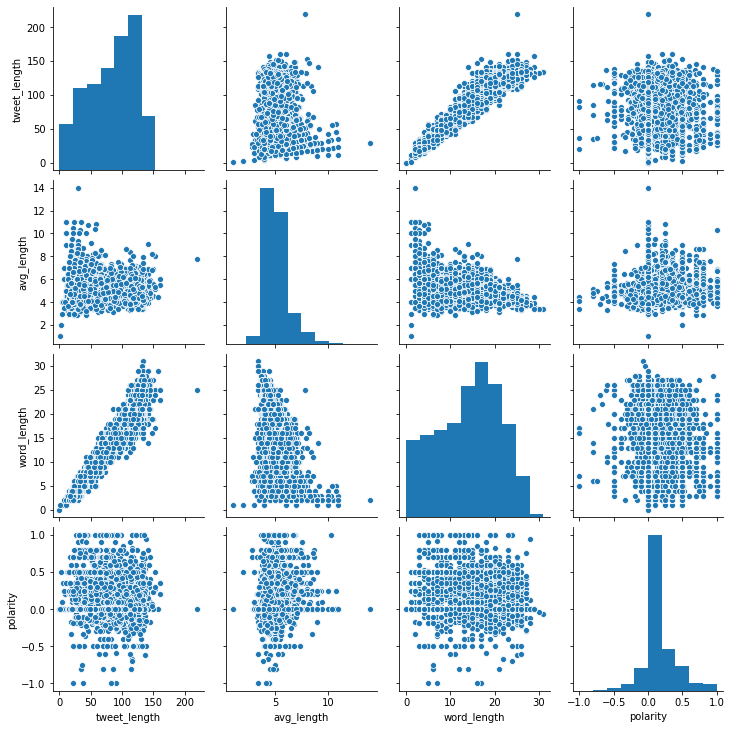

In [231]:
sns.pairplot(ndf)

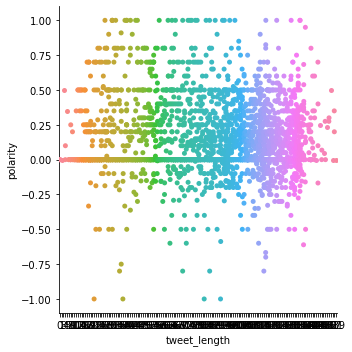

In [234]:
sns.catplot(x='tweet_length', y='polarity', data=ndf)